- Create database.
- Ingest data
- Run notebook.
- Connect data from sql database.
- Store clean data in sql database.
- Store results in sql database.
- Move local database to cloud.
- change notebook connections to cloud sql database.
- Read and validate notebook using the data from cloud sql database.
- Create streamlit webpage.
- Show results in the webpage.

In [62]:
import pandas as pd
import numpy as np
import pyodbc as pyodbc
import matplotlib.pyplot as plt
import seaborn as sns

import os

import streamlit as st

from sklearn.model_selection import train_test_split



Tables:
- dbo.Churn_Modelling
- dbo.training_data
- dbo.test_data
- dbo.results

UDFs:

In [45]:
def read_data(file:str)->pd.DataFrame:
    df = pd.read_csv(file)
    return df

def clean_data(df:pd.DataFrame)->pd.DataFrame:
    df["Churn"].replace({"Yes":1, "No":0}, inplace = True)
    columns = ['customerID', 'gender','PhoneService', 'Contract', 'TotalCharges']
    df.drop(columns, axis="columns", inplace=True)
    df["PaymentMethod"].astype("category").cat.codes
    df["PaymentMethod"].astype("category").head()
    return df

def create_local_db_connection(server, database, driver)->pyodbc.Connection.cursor:
    """
    input: local server, database, driver to use.
    output: cursor made on pyodbc connection.
    """
    connection = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';DATABASE='+database+';Trusted_Connection=yes')
    cursor = connection.cursor()
    return cursor


azure_server = 'mavericksqlserver.database.windows.net'
azure_database = 'bank'
azure_username = 'sqlserveradmin'
azure_password = 'B@RNFROMBOOMBoX65'   
def create_azure_db_connection(azure_server, azure_database, azure_username, azure_password, driver)->pyodbc.Connection.cursor:
    connection = pyodbc.connect('DRIVER='+driver+';SERVER='+azure_server+';DATABASE='+azure_database+';UID='+azure_username+';PWD='+ azure_password)
    cursor = connection.cursor()
    return cursor


def truncate_table(table_name:str, cursor: pyodbc.Connection.cursor):
    query = f"TRUNCATE TABLE [bank].[dbo].[{table_name}]"
    cursor.execute(query)
    print("Table Truncated.")


def insert_train_data(df:pd.DataFrame, table_name:str, cursor:pyodbc.Connection.cursor):
    query = f"INSERT INTO [dbo].[{table_name}] () VALUES ()"
    for index, row in df.iterrows():
        cursor.execute(
            query,
        )

def insert_test_data(df:pd.DataFrame, table_name:str, cursor:pyodbc.Connection.cursor):
    query = f"INSERT INTO [dbo].[{table_name}] () VALUES ()"
    for index, row in df.iterrows():
        cursor.execute(
            query,
        )


def insert_results(df:pd.DataFrame, table_name:str, cursor:pyodbc.Connection.cursor):
    query = f"INSERT INTO [dbo].[{table_name}] () VALUES ()"
    for index, row in df.iterrows():
        cursor.execute(
            query,
        )


def setup_webpage():
    """
    Streamlist webpage to show model results.
    """
    pass


Test Query

In [41]:
query = "SELECT TOP (1) * FROM dbo.Churn_Modelling"
server = 'localhost'
database = 'bank'
driver= '{ODBC Driver 17 for SQL Server}'
cursor = create_local_db_connection(server, database, driver)
cursor.execute(query)
for row in cursor:
    print(row)

(15565701, 'Ferri', 698, 'Spain', 'Female', 39, '9', '161993.89', '1', '0', '0', 90212.38, '0')


In [ ]:
server = 'mavericksqlserver.database.windows.net'
database = 'bank'
username = 'sqlserveradmin'
password = 'B@RNFROMBOOMBoX65'   
driver= '{ODBC Driver 17 for SQL Server}'
port = '1433'
connection = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)

In [35]:
df = pd.read_csv('data.csv')

In [46]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [48]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [49]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [50]:
df.duplicated().sum()

0

In [52]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [53]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [54]:
df["Churn"].value_counts(normalize = True)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [55]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [56]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
df["gender"].value_counts().shape[0]

2

In [58]:
b_c = []
for i in df.columns:
    vc = df[i].value_counts().shape[0]
    if vc == 2:
        b_c.append(i)

In [59]:
b_c

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [60]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<AxesSubplot: xlabel='gender', ylabel='count'>

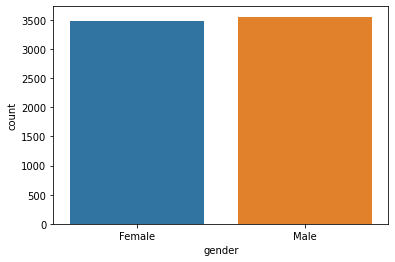

In [63]:
sns.countplot(data = df, x = "gender")

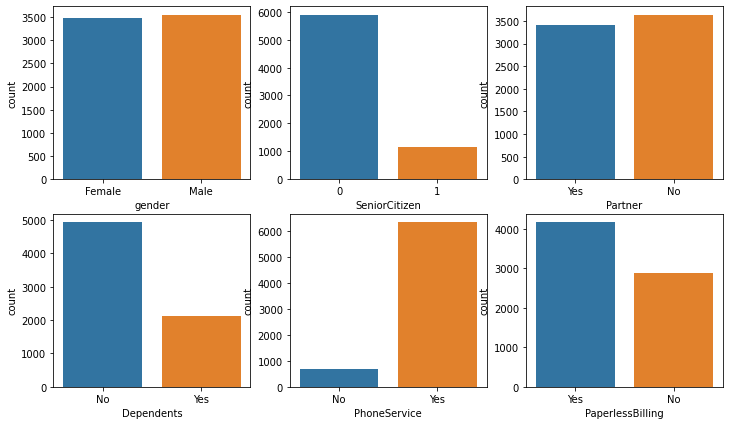

In [64]:
fig, axes = plt.subplots(nrows =2 , ncols = 3, figsize =(12,7) )
sns.countplot(data = df, x = "gender", ax = axes[0,0])
sns.countplot(data = df, x = 'SeniorCitizen', ax = axes[0,1])
sns.countplot(data = df, x = 'Partner', ax = axes[0,2])
sns.countplot(data = df, x = 'Dependents', ax = axes[1,0])
sns.countplot(data = df, x = 'PhoneService', ax = axes[1,1])
sns.countplot(data = df, x = 'PaperlessBilling', ax = axes[1,2])
plt.show()

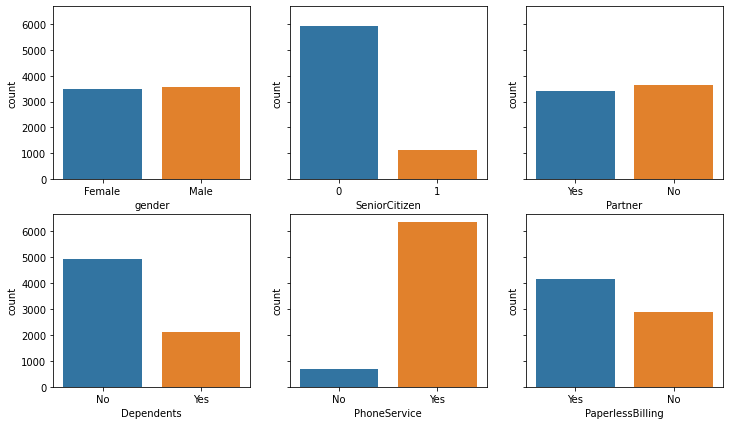

In [65]:
fig, axes = plt.subplots(nrows =2 , ncols = 3, figsize =(12,7), sharey = True)
sns.countplot(data = df, x = "gender", ax = axes[0,0])
sns.countplot(data = df, x = 'SeniorCitizen', ax = axes[0,1])
sns.countplot(data = df, x = 'Partner', ax = axes[0,2])
sns.countplot(data = df, x = 'Dependents', ax = axes[1,0])
sns.countplot(data = df, x = 'PhoneService', ax = axes[1,1])
sns.countplot(data = df, x = 'PaperlessBilling', ax = axes[1,2])
plt.show()

In [67]:
df["Churn"].replace({"Yes":1, "No":0}, inplace = True)
df.groupby("gender")["Churn"].mean()

gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64

In [68]:
c = ['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling']

for i in c:
    print(df.groupby(i)["Churn"].mean())

SeniorCitizen
0    0.236062
1    0.416813
Name: Churn, dtype: float64
Partner
No     0.329580
Yes    0.196649
Name: Churn, dtype: float64
Dependents
No     0.312791
Yes    0.154502
Name: Churn, dtype: float64
PhoneService
No     0.249267
Yes    0.267096
Name: Churn, dtype: float64
PaperlessBilling
No     0.163301
Yes    0.335651
Name: Churn, dtype: float64


In [69]:
df[['PhoneService','MultipleLines']].head(25)

,PhoneService,MultipleLines
0,No,No phone service
1,Yes,No
2,Yes,No
3,No,No phone service
4,Yes,No
5,Yes,Yes
6,Yes,Yes
7,No,No phone service
8,Yes,Yes
9,Yes,No


In [70]:
inter = ['InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

In [71]:
for i in inter:
    print(df[i].value_counts())

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


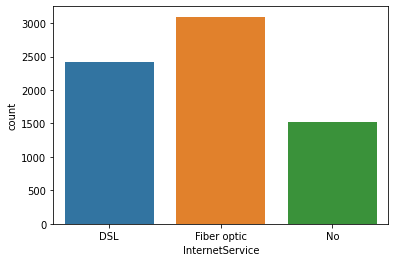

In [72]:
sns.countplot(data = df, x = 'InternetService')
plt.show()

In [73]:
df.pivot_table(index = "InternetService", values = "Churn", aggfunc = "mean")

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [74]:
df.groupby("InternetService")['MonthlyCharges'].mean()
for i in inter:
    print(df.groupby(i)["Churn"].mean())

InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn, dtype: float64
OnlineSecurity
No                     0.417667
No internet service    0.074050
Yes                    0.146112
Name: Churn, dtype: float64
OnlineBackup
No                     0.399288
No internet service    0.074050
Yes                    0.215315
Name: Churn, dtype: float64
DeviceProtection
No                     0.391276
No internet service    0.074050
Yes                    0.225021
Name: Churn, dtype: float64
TechSupport
No                     0.416355
No internet service    0.074050
Yes                    0.151663
Name: Churn, dtype: float64
StreamingTV
No                     0.335231
No internet service    0.074050
Yes                    0.300702
Name: Churn, dtype: float64
StreamingMovies
No                     0.336804
No internet service    0.074050
Yes                    0.299414
Name: Churn, dtype: float64


In [76]:
df["Contract"].value_counts()
df.groupby("Contract")['MonthlyCharges'].mean()

Contract
Month-to-month    66.398490
One year          65.048608
Two year          60.770413
Name: MonthlyCharges, dtype: float64

In [77]:
df.groupby("Contract")['Churn'].mean()


Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64

In [78]:
df.groupby('PaymentMethod')['Churn'].mean()

PaymentMethod
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Electronic check             0.452854
Mailed check                 0.191067
Name: Churn, dtype: float64

In [79]:
df[['MonthlyCharges', 'TotalCharges']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MonthlyCharges  7043 non-null   float64
 1   TotalCharges    7043 non-null   object 
dtypes: float64(1), object(1)
memory usage: 110.2+ KB


In [80]:
df['TotalCharges'].value_counts(dropna = False)

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [81]:
tc = df["tenure"]*df["MonthlyCharges"]
df['TotalCharges'].value_counts().index

Index([' ', '20.2', '19.75', '20.05', '19.9', '19.65', '45.3', '19.55',
       '20.15', '20.25',
       ...
       '3306.85', '424.75', '6565.85', '2117.2', '203.95', '6849.4', '692.35',
       '130.15', '3211.9', '6844.5'],
      dtype='object', length=6531)

In [82]:
df['TotalCharges'] = tc

In [83]:
df[["MonthlyCharges",'TotalCharges']].corr()

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.651566
TotalCharges,0.651566,1.000000


In [84]:
df[["Contract", "tenure"]]

,Contract,tenure
0,Month-to-month,1
1,One year,34
2,Month-to-month,2
3,One year,45
4,Month-to-month,2
...,...,...
7038,One year,24
7039,One year,72
7040,Month-to-month,11
7041,Month-to-month,4


In [85]:
df[["Contract", "tenure"]].groupby("Contract").mean() # utmost

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


In [88]:
d = ['customerID', 'gender','PhoneService', 'Contract', 'TotalCharges']
df.drop(d, axis = "columns", inplace = True)

Data Processing

In [89]:
df["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [90]:
df["PaymentMethod"].astype("category").cat.codes


0       2
1       3
2       3
3       0
4       2
       ..
7038    3
7039    1
7040    2
7041    3
7042    0
Length: 7043, dtype: int8

In [91]:
df["PaymentMethod"].astype("category").head()


0             Electronic check
1                 Mailed check
2                 Mailed check
3    Bank transfer (automatic)
4             Electronic check
Name: PaymentMethod, dtype: category
Categories (4, object): ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']

In [92]:
df["PaymentMethod"].astype("category").cat.codes.value_counts()

2    2365
3    1612
0    1544
1    1522
dtype: int64

In [93]:
df["PaymentMethod"].astype("category").cat.codes.head() 

0    2
1    3
2    3
3    0
4    2
dtype: int8

In [94]:
pd.Categorical(df["PaymentMethod"]).codes

array([2, 3, 3, ..., 2, 3, 0], dtype=int8)

In [98]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import numpy as np

In [96]:
le = LabelEncoder()    
le.fit_transform(df["PaymentMethod"])
pd.get_dummies(df["PaymentMethod"])

,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
7038,0,0,0,1
7039,0,1,0,0
7040,0,0,1,0
7041,0,0,0,1


In [97]:
ohe = OneHotEncoder()

In [99]:
pm = np.array(df["PaymentMethod"]).reshape(-1, 1)
ohe.fit(np.array(df["PaymentMethod"]).reshape(1, -1))

OneHotEncoder()

In [100]:
o = []
for c in df.columns:
    if df[c].dtype == "object":
        # print(c)
        o.append(c)

In [101]:
print(o)

['Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']


In [102]:
df[o]

,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check
1,No,No,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check
2,No,No,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check
3,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic)
4,No,No,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,Mailed check
7039,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,Credit card (automatic)
7040,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No,Yes,Electronic check
7041,Yes,No,Yes,Fiber optic,No,No,No,No,No,No,Yes,Mailed check


In [103]:
x =pd.get_dummies(df[o])

In [104]:
df[["tenure","MonthlyCharges", "SeniorCitizen"]]

,tenure,MonthlyCharges,SeniorCitizen
0,1,29.85,0
1,34,56.95,0
2,2,53.85,0
3,45,42.30,0
4,2,70.70,0
...,...,...,...
7038,24,84.80,0
7039,72,103.20,0
7040,11,29.60,0
7041,4,74.40,1


In [105]:
mm = MinMaxScaler()

t = mm.fit_transform(df[["tenure"]])
mc = mm.fit_transform(df[["MonthlyCharges"]])

In [106]:
x["tenure"] = t
x["MonthlyCharges"] = mc
x["SeniorCitizen"] = df["SeniorCitizen"]

In [108]:
x["Churn"] = df["Churn"]
x[x["Churn"] == 1]

,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,SeniorCitizen,Churn
2,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0.027778,0.354229,0,1
4,1,0,1,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0.027778,0.521891,0,1
5,1,0,1,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0.111111,0.809950,0,1
8,0,1,1,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0.388889,0.861194,0,1
13,1,0,1,0,0,0,1,0,1,0,...,0,1,1,0,0,0,0.680556,0.850249,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0.166667,0.413433,0,1
7026,1,0,1,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0.125000,0.258209,0,1
7032,1,0,1,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0.013889,0.572139,1,1
7034,1,0,1,0,0,0,1,0,1,0,...,0,1,0,1,0,0,0.930556,0.842786,0,1


In [109]:
churn_yes = x[x["Churn"] == 1]
churn_no  = x[x["Churn"] == 0]
churn_yes["Churn"].unique()
churn_no["Churn"].unique()
x_yes_up = churn_yes.sample(5174, random_state = 42, replace = True) 

In [110]:
x_yes_up.duplicated()

4290    False
5547    False
3302    False
4949    False
4307    False
        ...  
6757     True
4851     True
2567     True
2054     True
5759     True
Length: 5174, dtype: bool

In [111]:
x_yes_up.duplicated().sum()

3488

In [112]:
bol = x_yes_up.duplicated()

In [113]:
x_yes_up[bol]

,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,SeniorCitizen,Churn
3671,1,0,1,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0.013889,0.565672,0,1
3662,1,0,1,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0.125000,0.267662,0,1
4949,1,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0.069444,0.325871,0,1
5628,1,0,1,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0.180556,0.780100,0,1
1926,0,1,0,1,0,0,1,0,1,0,...,0,1,0,0,1,0,0.680556,0.811443,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,0,1,0,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0.708333,0.408458,0,1
4851,1,0,1,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0.041667,0.518905,1,1
2567,0,1,1,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0.833333,0.771144,0,1
2054,1,0,1,0,0,0,1,1,0,0,...,0,1,0,0,1,0,0.027778,0.309950,0,1


In [114]:
upsampled =x_yes_up.append(churn_no)

C:\Users\tariq_aziz\AppData\Local\Temp\1\ipykernel_6988\1765937894.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  upsampled =x_yes_up.append(churn_no)


In [115]:
upsampled.reset_index(drop = True, inplace = True)

In [116]:
x = upsampled.drop("Churn", axis = 1).copy()
y = upsampled["Churn"].copy()

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [118]:
x_train, x_test, y_train,y_test= train_test_split(x,y,test_size = 0.2, random_state = 42)
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [151]:
x_train.to_csv('training_data.csv', encoding='utf-8')
x_test.to_csv('test_data.csv', encoding='utf-8')


In [122]:
churn_predict = lg.predict(x_test)
churn_actual = y_test
(churn_actual == churn_predict).sum()

1580

In [134]:
df_churn = pd.DataFrame(churn_predict, columns=['churn'])
df_churn.head()

,churn
0,0
1,1
2,1
3,0
4,0


Prediction Results

In [138]:
df_results = pd.merge(x_test, df_churn, left_index=True, right_index=True).reset_index(drop=True)
df_results.head()

,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,SeniorCitizen,churn
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0.152778,0.564179,0,1
1,1,0,1,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0.013889,0.511443,0,0
2,0,1,1,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0.847222,0.754726,0,0
3,1,0,1,0,1,0,0,0,1,0,...,0,1,1,0,0,0,0.347222,0.612935,0,1
4,1,0,1,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0.027778,0.561692,1,1


Insert prediction results into database.

In [152]:
df_results.to_csv('predictions.csv', encoding='utf-8')

In [123]:
accuracy_score(churn_actual, churn_predict)

0.7632850241545893

In [124]:
print(churn_predict)

[0 1 1 ... 1 1 0]


Web Application